In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
file_path = '/content/drive/MyDrive/Diplomado Ciencia de Datos/Visualizacion en python/metadata.csv'
df = pd.read_csv(file_path)
df.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra


In [13]:
file_path1 = '/content/drive/MyDrive/Diplomado Ciencia de Datos/Visualizacion en python/happiness_report.csv'
df1 = pd.read_csv(file_path1)
df1.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


3.	A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México. Haz que la columna Country or region quede como índice.

In [20]:
mexico=df1[df1['Country or region'] == "Mexico"]
mexico = mexico.set_index('Country or region')
mexico.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

Text(6.595, 0, 'Mex')

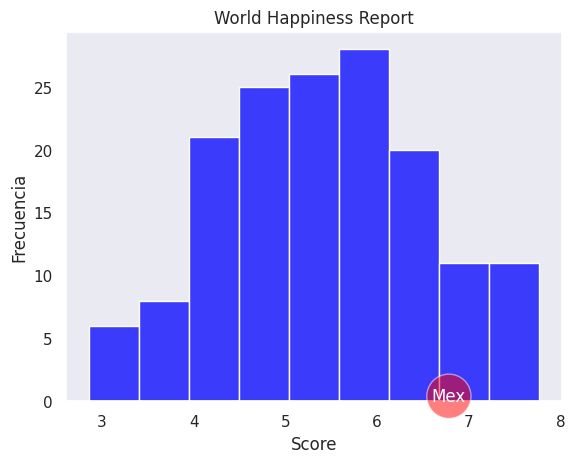

In [88]:
sns.set(style="whitegrid")
sns.set_style('darkgrid')
sns.histplot(data=df1, x='Score', color='blue')
plt.title('World Happiness Report')
plt.xlabel('Score')
plt.ylabel('Frecuencia')
plt.grid(visible=False)
props_bbox = {'boxstyle': 'circle',
'facecolor': 'red',
'alpha': .5}

plt.text(6.595,0,'Mex',bbox=props_bbox,color='white')


5.	Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación.

Text(1, 1, 'Mex')

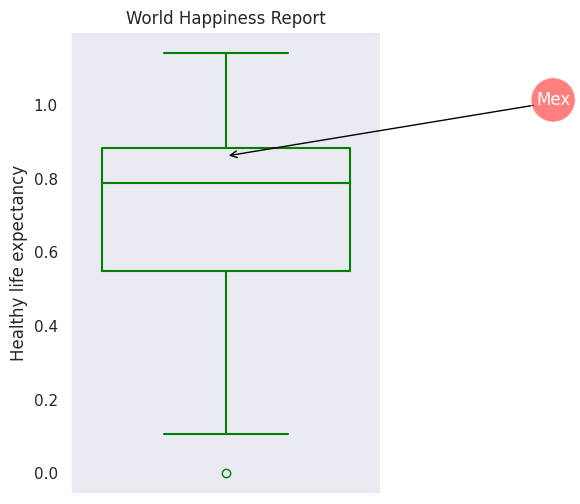

In [86]:
plt.figure(figsize=(4, 6))
sns.set_style('darkgrid')
sns.boxplot(df1, y='Healthy life expectancy', fill=False,color="Green")
plt.annotate('',xy=(0,0.861),xytext=(1,1),arrowprops=dict(arrowstyle='->', edgecolor='black'))
plt.title('World Happiness Report')
plt.grid(visible=False)
props_bbox = {'boxstyle': 'circle',
'facecolor': 'red',
'alpha': .5}
plt.text(1,1,'Mex',bbox=props_bbox,color='white')

6.	Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México

In [117]:
factors=mexico.drop(columns=['Overall rank', 'Score'])
factors=factors.T
factors.head()

Country or region,Mexico
GDP per capita,1.070
Social support,1.323
Healthy life expectancy,0.861
Freedom to make life choices,0.433
Generosity,0.074


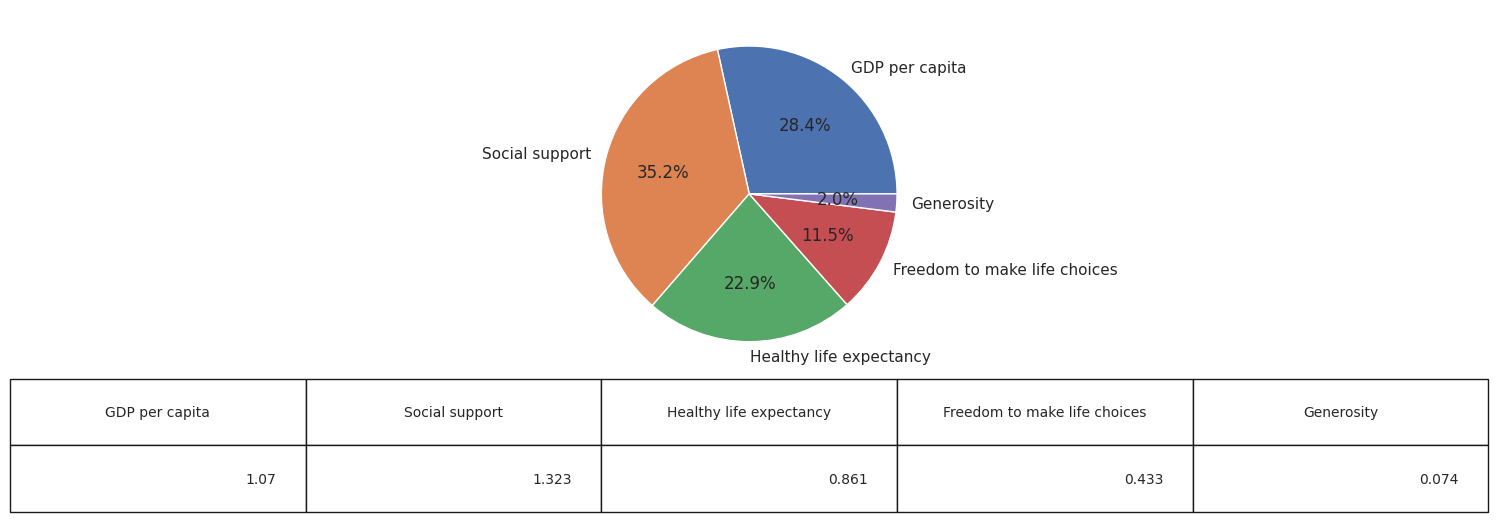

In [126]:
data = {
    'GDP per capita': 1.070,
    'Social support': 1.323,
    'Healthy life expectancy': 0.861,
    'Freedom to make life choices': 0.433,
    'Generosity': 0.074
}

# Extraer las etiquetas (nombres de las métricas) y los valores del diccionario
etiquetas = list(data.keys())
valores = list(data.values())

plt.pie(valores, labels=etiquetas, autopct='%1.1f%%')

tabla = plt.table(cellText=[valores], colLabels=etiquetas, loc='bottom')
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(4, 4)

7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores

In [166]:
# Lista de nombres de países o regiones que quieres seleccionar
num = [1,156]

# Seleccionar las filas donde el país o región esté en la lista de nombres
num_1 = df1[df1['Overall rank'].isin(num)]

In [167]:
num_1

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [170]:
# Lista de nombres de países o regiones que quieres seleccionar
nombres = ["Mexico", "United Kingdom", "Finland", "South Sudan","Brazil"]

# Seleccionar las filas donde el país o región esté en la lista de nombres
tabla = df1[df1['Country or region'].isin(nombres)]

In [171]:
tabla.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
14,15,United Kingdom,7.054,1.333,1.538,0.996,0.450,0.348,0.278
22,23,Mexico,6.595,1.070,1.323,0.861,0.433,0.074,0.073
31,32,Brazil,6.300,1.004,1.439,0.802,0.390,0.099,0.086
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [175]:
tabla=tabla.drop(columns=['Overall rank', 'Score'])
tabla.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,
Finland,1.340,1.587,0.986,0.596,0.153,0.393
United Kingdom,1.333,1.538,0.996,0.450,0.348,0.278
Mexico,1.070,1.323,0.861,0.433,0.074,0.073
Brazil,1.004,1.439,0.802,0.390,0.099,0.086
South Sudan,0.306,0.575,0.295,0.010,0.202,0.091


In [186]:
tabla_reset = tabla.reset_index()
tabla_reset.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,1.340,1.587,0.986,0.596,0.153,0.393
1,United Kingdom,1.333,1.538,0.996,0.450,0.348,0.278
2,Mexico,1.070,1.323,0.861,0.433,0.074,0.073
3,Brazil,1.004,1.439,0.802,0.390,0.099,0.086
4,South Sudan,0.306,0.575,0.295,0.010,0.202,0.091


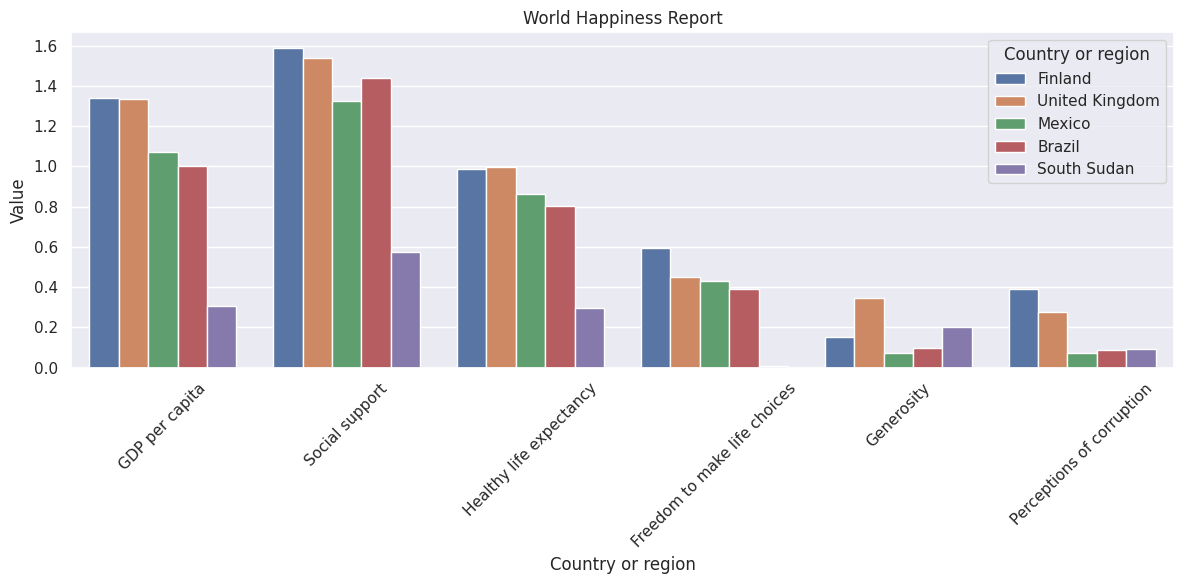

In [199]:
tabla_reset.T
df_melted = df_transposed.reset_index().melt(id_vars='index', var_name='Metric', value_name='Value')

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='index', y='Value', hue='Metric')
plt.title('World Happiness Report')
plt.xlabel('Country or region')


# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)
plt.legend(title='Country or region')
plt.tight_layout()
plt.show()

8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,
Finland,1.340,1.587,0.986,0.596,0.153,0.393
United Kingdom,1.333,1.538,0.996,0.450,0.348,0.278
Mexico,1.070,1.323,0.861,0.433,0.074,0.073
Brazil,1.004,1.439,0.802,0.390,0.099,0.086
South Sudan,0.306,0.575,0.295,0.010,0.202,0.091


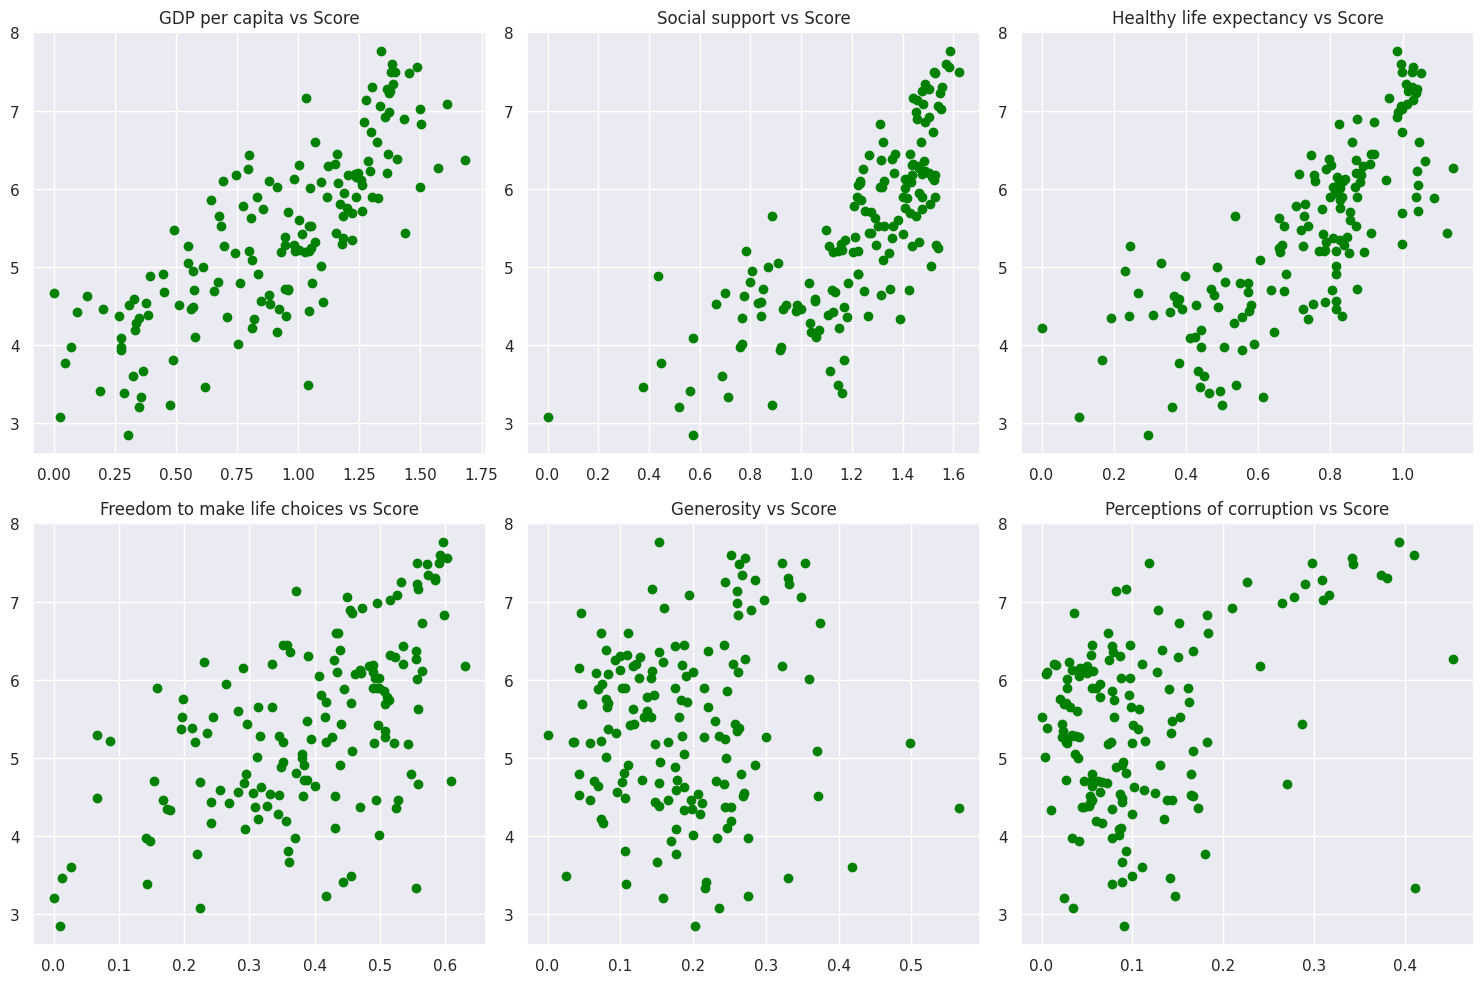

In [203]:
factores = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Crear la matriz de subgráficas
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Iterar sobre los factores y crear un scatter plot para cada uno
for i, factor in enumerate(factores):
    # Calcular los índices de subgráfica (fila y columna)
    fila = i // 3
    columna = i % 3
    # Crear el scatter plot en la subgráfica correspondiente
    axs[fila, columna].scatter(df1[factor], df1['Score'], color='green')
    # Añadir título al scatter plot
    axs[fila, columna].set_title(f'{factor} vs Score')

# Ajustar espaciado entre subgráficas
plt.tight_layout()

# Mostrar la matriz de subgráficas
plt.show()


Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.


<ipython-input-211-a82cc4b37432>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


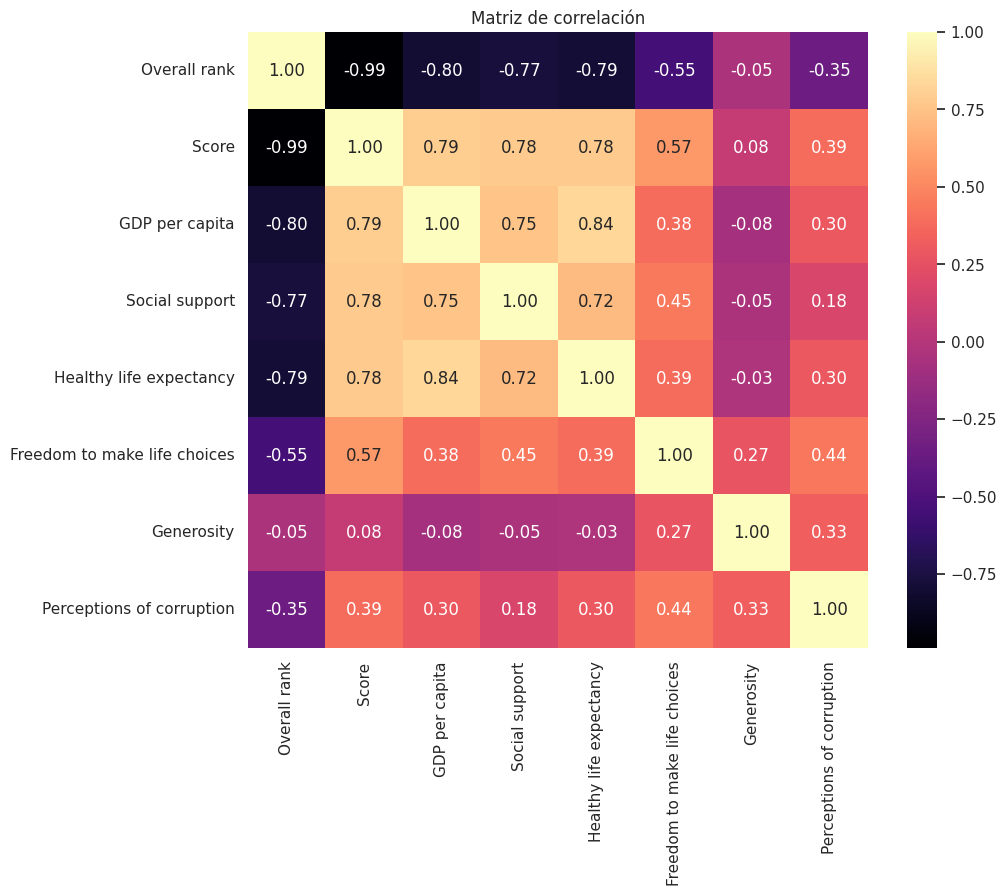

In [211]:
correlation_matrix = df1.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f")

# Añadir título
plt.title('Matriz de correlación')

# Mostrar el mapa de calor
plt.show()

9.	Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.

In [220]:
df_cruzado = pd.merge(df1, df, left_on='Country or region', right_on='TableName', how='outer')
df_cruzado.head()



,Overall rank,Country or region_x,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Country or region_y
0,1.0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,FIN,Europe & Central Asia,High income,A simple multiplier is used to convert the nat...,Finland,Mexico
1,2.0,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,DNK,Europe & Central Asia,High income,NaN,Denmark,Mexico
2,3.0,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,NOR,Europe & Central Asia,High income,NaN,Norway,Mexico
3,4.0,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,ISL,Europe & Central Asia,High income,NaN,Iceland,Mexico
4,5.0,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,NLD,Europe & Central Asia,High income,A simple multiplier is used to convert the nat...,Netherlands,Mexico


<ipython-input-235-e1cf76ebcce3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(promedio_agrupado, x='Region', y='Score',palette='Set2')


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'East Asia & Pacific'),
  Text(1, 0, 'Europe & Central Asia'),
  Text(2, 0, 'Latin America & Caribbean'),
  Text(3, 0, 'Middle East & North Africa'),
  Text(4, 0, 'North America'),
  Text(5, 0, 'South Asia'),
  Text(6, 0, 'Sub-Saharan Africa')])

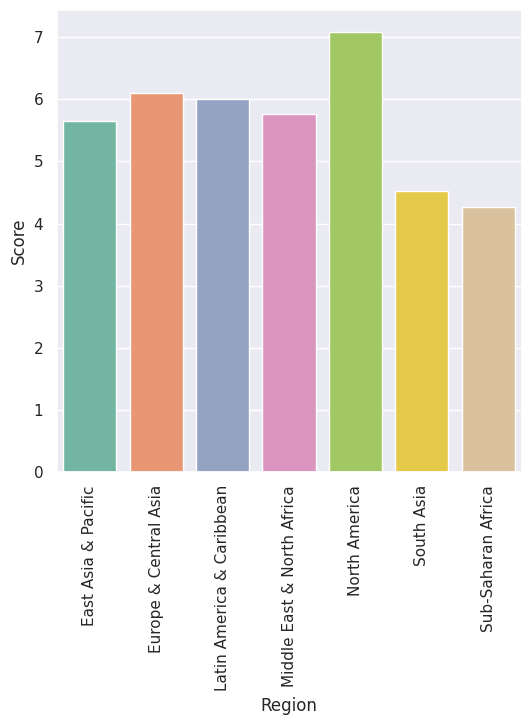

In [235]:
promedio_agrupado = df_cruzado.groupby('Region')['Score'].mean().reset_index()
plt.figure(figsize=(6, 6))
sns.barplot(promedio_agrupado, x='Region', y='Score',palette='Set2')
plt.xticks(rotation=90)